In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
report = pd.read_csv('Analysis Project.csv')
report.head()

,State,County,Year,Population,Murder,Rape1,Robbery,Aggravated \nassault,Burglary,Larceny-\ntheft,...,Number of University,Student Count,awards_per_value,awards_per_state_value,awards_per_natl_value,grad_100_value,grad_150_value,pell_value,retain_value,cohort_size
0,New York,Canajoharie Village,2017,2132,0,0,0,0,0,16.0,...,9,52366,207,200,197,224,328,449,493,8586
1,New York,Canisteo Village,2017,2171,0,0,0,0,5,3.0,...,1,6389,20,18,17,15,27,41,49,1472
2,New York,Cape Vincent Village,2017,716,0,0,0,0,0,4.0,...,2,5926,52,45,44,100,109,74,165,704
3,New York,Carroll Town,2017,3366,0,0,0,0,0,0.0,...,2,5926,52,45,44,100,109,74,165,704
4,New York,Carthage Village,2017,3425,0,2,3,2,8,47.0,...,2,5926,52,45,44,100,109,74,165,704


In [3]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   868 non-null    object 
 1   County                  868 non-null    object 
 2   Year                    868 non-null    int64  
 3   Population              868 non-null    int64  
 4   Murder                  868 non-null    int64  
 5   Rape1                   868 non-null    int64  
 6   Robbery                 868 non-null    int64  
 7   Aggravated 
assault     868 non-null    int64  
 8   Burglary                868 non-null    int64  
 9   Larceny-
theft          867 non-null    float64
 10  Motor
vehicle
theft     868 non-null    int64  
 11  Arson2                  859 non-null    float64
 12  Employed                868 non-null    int64  
 13  Unemployed              868 non-null    int64  
 14  Income                  868 non-null    in

In [4]:
report.isnull().sum()

State                     0
County                    0
Year                      0
Population                0
Murder                    0
Rape1                     0
Robbery                   0
Aggravated \nassault      0
Burglary                  0
Larceny-\ntheft           1
Motor\nvehicle\ntheft     0
Arson2                    9
Employed                  0
Unemployed                0
Income                    0
Rental Price_1 bedroom    0
Rental Price_2 bedroom    0
Number of University      0
Student Count             0
awards_per_value          0
awards_per_state_value    0
awards_per_natl_value     0
grad_100_value            0
grad_150_value            0
pell_value                0
retain_value              0
cohort_size               0
dtype: int64

In [5]:
# Drop Null Value because of small sample:
report.dropna(subset=['Arson2','Larceny-\ntheft'],axis=0,inplace=True)

In [6]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858 entries, 0 to 867
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   858 non-null    object 
 1   County                  858 non-null    object 
 2   Year                    858 non-null    int64  
 3   Population              858 non-null    int64  
 4   Murder                  858 non-null    int64  
 5   Rape1                   858 non-null    int64  
 6   Robbery                 858 non-null    int64  
 7   Aggravated 
assault     858 non-null    int64  
 8   Burglary                858 non-null    int64  
 9   Larceny-
theft          858 non-null    float64
 10  Motor
vehicle
theft     858 non-null    int64  
 11  Arson2                  858 non-null    float64
 12  Employed                858 non-null    int64  
 13  Unemployed              858 non-null    int64  
 14  Income                  858 non-null    in

In [7]:
# Change data type
report['Burglary']=report['Burglary'].astype(float, copy=True)
report['Motor\nvehicle\ntheft']=report['Motor\nvehicle\ntheft'].astype(float, copy=True)

In [8]:
# Add violence crime, property crime, and total crime columns:
report['violence_crime'] = report['Murder'] + report['Rape1'] + report['Robbery'] + report['Aggravated \nassault']

report['property_crime'] = report['Burglary'] + report['Larceny-\ntheft'] + report['Motor\nvehicle\ntheft'] + report['Arson2']

report['Total_crime'] = report['violence_crime'] + report['property_crime']

In [9]:
# Add % unemployed vs % employed
report['%_unemployed'] = report['Unemployed']/(report['Employed'] + report['Unemployed'])

report['%_employed'] = report['Employed']/(report['Employed'] + report['Unemployed'])

In [10]:
# Add total award column and total grad value:
report['total_award'] = report['awards_per_value'] + report['awards_per_state_value'] + report['awards_per_natl_value']
report['total_grad_value'] = report['grad_100_value'] + report['grad_150_value']

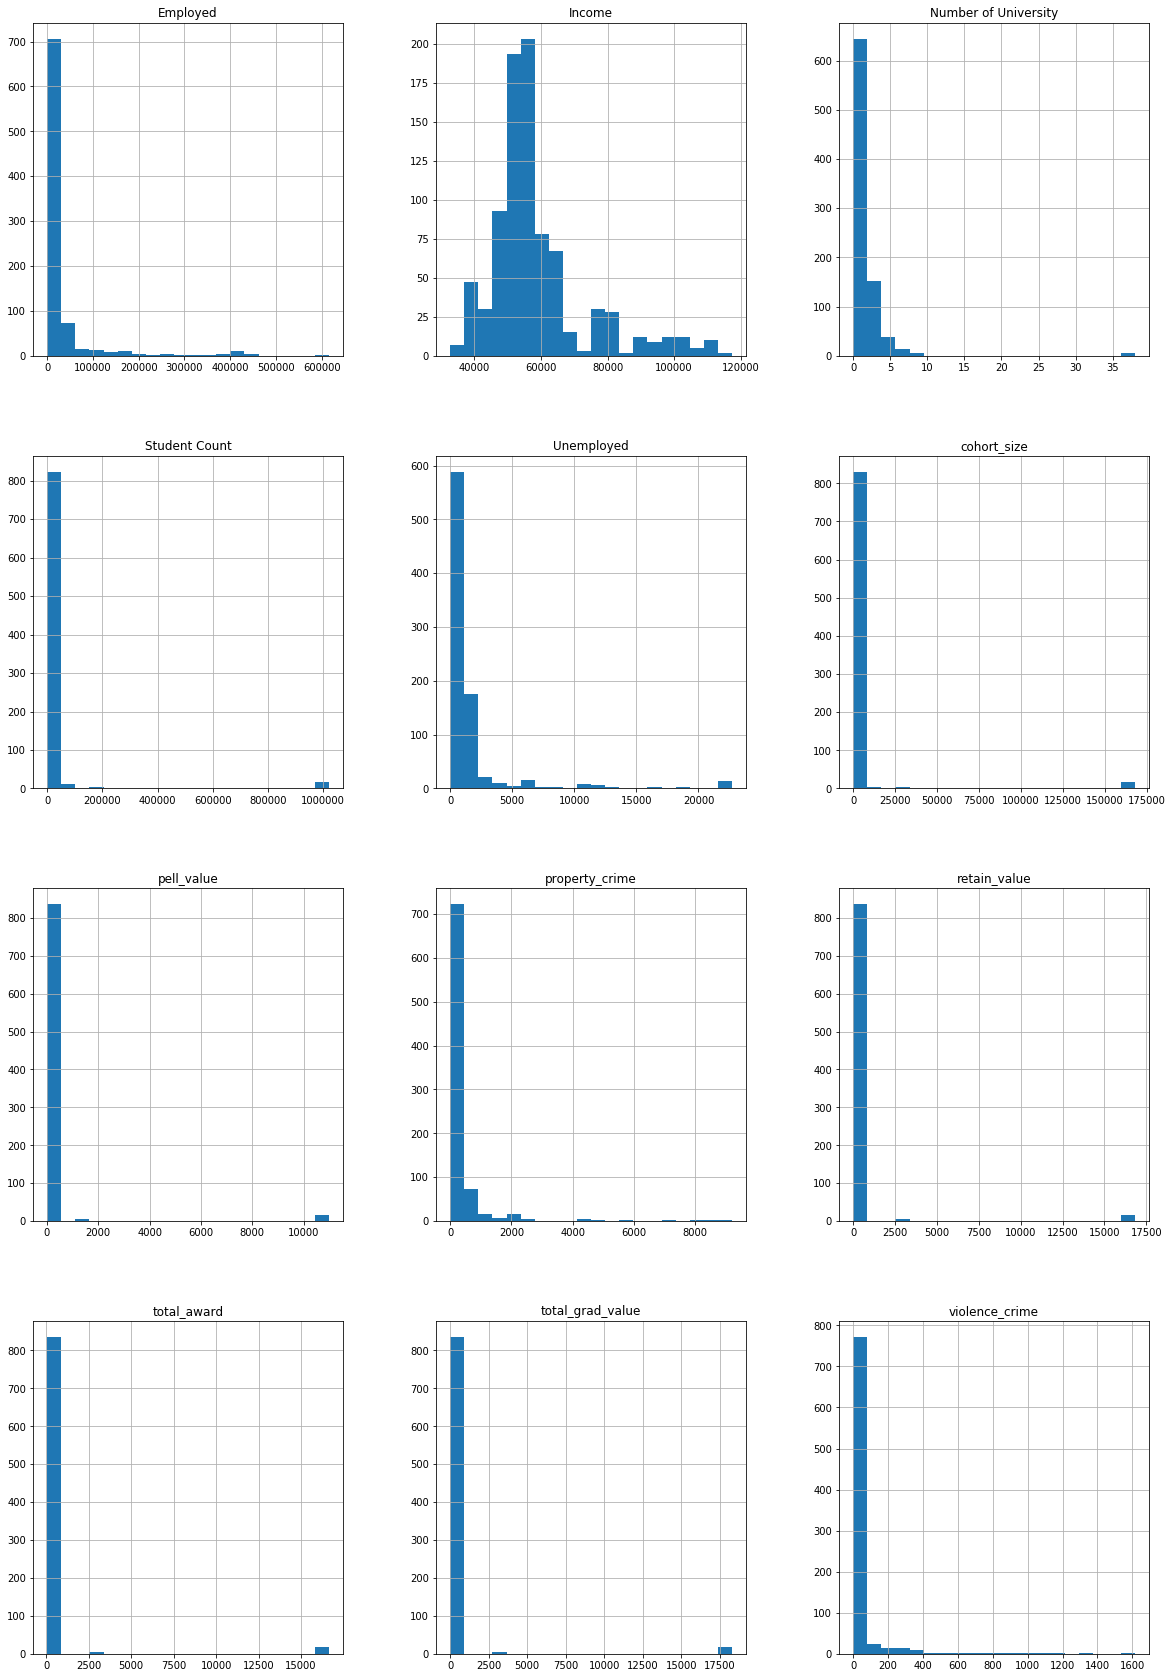

In [11]:
# Histogram of some important values
report_update = report[['violence_crime','property_crime','Employed','Unemployed','Income','Number of University','Student Count','total_award','total_grad_value','pell_value','retain_value','cohort_size']]
report_update.hist(bins= 20, figsize=(20,30))
plt.show()

**Exploratory Data Analysis**

In [12]:
report_new = report[['State','County','Year','violence_crime','property_crime','Total_crime','Employed','Unemployed','Income','Rental Price_1 bedroom','Rental Price_2 bedroom','Number of University','Student Count','total_award','total_grad_value','pell_value','retain_value','cohort_size']]

report_new

,State,County,Year,violence_crime,property_crime,Total_crime,Employed,Unemployed,Income,Rental Price_1 bedroom,Rental Price_2 bedroom,Number of University,Student Count,total_award,total_grad_value,pell_value,retain_value,cohort_size
0,New York,Canajoharie Village,2017,0,16.0,16.0,4524,2486,58743,876,1133,9,52366,604,552,449,493,8586
1,New York,Canisteo Village,2017,0,8.0,8.0,4524,2486,54114,1031,1554,1,6389,55,42,41,49,1472
2,New York,Cape Vincent Village,2017,0,4.0,4.0,4524,2486,55765,2194,1554,2,5926,141,209,74,165,704
3,New York,Carroll Town,2017,0,0.0,0.0,4524,2486,57914,1031,1414,2,5926,141,209,74,165,704
4,New York,Carthage Village,2017,7,57.0,64.0,30530,1012,54343,685,832,2,5926,141,209,74,165,704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Virginia,Winchester,2019,80,662.0,742.0,7409,305,56163,2589,4433,1,2150,65,80,19,76,396
864,Virginia,Windsor,2019,4,23.0,27.0,1498,131,53797,2589,4433,1,2150,65,80,19,76,396
865,Virginia,Wise,2019,3,58.0,61.0,448251,18657,38345,2589,4433,1,2291,59,66,38,71,401
866,Virginia,Woodstock,2019,10,125.0,135.0,22672,705,38345,2589,4433,1,2291,59,66,38,71,401


**We will look at the crime statistic at the state level**

Look at New York

In [13]:
# New York data
NY = report_new[report_new['State']=='New York']
NY

,State,County,Year,violence_crime,property_crime,Total_crime,Employed,Unemployed,Income,Rental Price_1 bedroom,Rental Price_2 bedroom,Number of University,Student Count,total_award,total_grad_value,pell_value,retain_value,cohort_size
0,New York,Canajoharie Village,2017,0,16.0,16.0,4524,2486,58743,876,1133,9,52366,604,552,449,493,8586
1,New York,Canisteo Village,2017,0,8.0,8.0,4524,2486,54114,1031,1554,1,6389,55,42,41,49,1472
2,New York,Cape Vincent Village,2017,0,4.0,4.0,4524,2486,55765,2194,1554,2,5926,141,209,74,165,704
3,New York,Carroll Town,2017,0,0.0,0.0,4524,2486,57914,1031,1414,2,5926,141,209,74,165,704
4,New York,Carthage Village,2017,7,57.0,64.0,30530,1012,54343,685,832,2,5926,141,209,74,165,704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,New York,Woodbury Town,2019,3,460.0,463.0,6231,235,63785,2589,3610,0,1020733,16652,18295,10984,16823,167788
769,New York,Woodstock Town,2019,3,33.0,36.0,6231,1620,51479,2589,3610,0,1020733,16652,18295,10984,16823,167788
770,New York,Yonkers,2019,708,1841.0,2549.0,8331,32,54695,2589,3610,0,1020733,16652,18295,10984,16823,167788
771,New York,Yorktown Town,2019,8,214.0,222.0,8331,458,49305,2589,3610,0,1020733,16652,18295,10984,16823,167788


In [14]:
NY.corr()

,Year,violence_crime,property_crime,Total_crime,Employed,Unemployed,Income,Rental Price_1 bedroom,Rental Price_2 bedroom,Number of University,Student Count,total_award,total_grad_value,pell_value,retain_value,cohort_size
Year,1.000000,0.022876,0.008634,0.011351,-0.096148,-0.029426,0.001426,-0.052397,-0.072261,0.032724,-0.046991,-0.045953,-0.045030,-0.046626,-0.046072,-0.047151
violence_crime,0.022876,1.000000,0.930515,0.953128,0.055094,0.000780,-0.017415,0.029707,0.095679,0.097773,0.073660,0.074624,0.075275,0.071827,0.073322,0.071314
property_crime,0.008634,0.930515,1.000000,0.997716,0.005460,-0.014728,0.010977,0.005494,0.082939,0.025738,0.020864,0.022859,0.022972,0.021233,0.021795,0.019311
Total_crime,0.011351,0.953128,0.997716,1.000000,0.014671,-0.012023,0.005856,0.010017,0.086162,0.039294,0.030820,0.032646,0.032860,0.030787,0.031527,0.029105
Employed,-0.096148,0.055094,0.005460,0.014671,1.000000,0.124062,0.059139,-0.001878,0.004154,0.001589,0.137359,0.135788,0.136436,0.136930,0.136921,0.137833
Unemployed,-0.029426,0.000780,-0.014728,-0.012023,0.124062,1.000000,-0.005284,0.054222,0.102643,0.011915,0.021107,0.019711,0.021663,0.019568,0.020865,0.021916
Income,0.001426,-0.017415,0.010977,0.005856,0.059139,-0.005284,1.000000,0.044589,-0.003918,-0.062784,0.039143,0.037212,0.036196,0.037868,0.038080,0.039568
Rental Price_1 bedroom,-0.052397,0.029707,0.005494,0.010017,-0.001878,0.054222,0.044589,1.000000,0.486275,-0.046879,0.209973,0.199628,0.199224,0.199181,0.201822,0.210984
Rental Price_2 bedroom,-0.072261,0.095679,0.082939,0.086162,0.004154,0.102643,-0.003918,0.486275,1.000000,-0.081778,0.257648,0.249302,0.248987,0.249304,0.250976,0.259810
Number of University,0.032724,0.097773,0.025738,0.039294,0.001589,0.011915,-0.062784,-0.046879,-0.081778,1.000000,0.018627,0.017062,0.024352,0.002961,0.009369,0.008776


In [15]:
#New York crime by year
Year_crime_NY=NY.groupby('Year')[['violence_crime','property_crime','Total_crime']].agg(np.sum)

Year_crime_NY

,violence_crime,property_crime,Total_crime
Year,,,
2017,6221,44710.0,50931.0
2018,8217,53619.0,61836.0
2019,9227,56677.0,65904.0


Text(0, 0.5, 'Number of Crime')

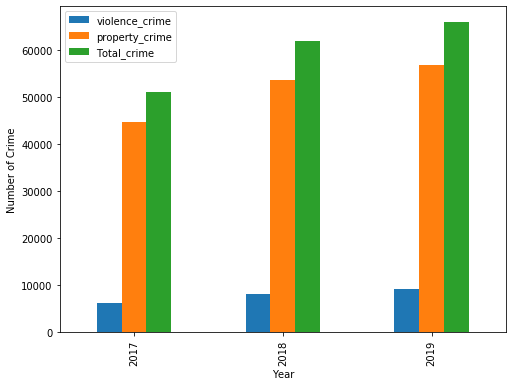

In [16]:
Year_crime_NY.plot(kind='bar',figsize=(8,6))

plt.ylabel('Number of Crime')

Text(0, 0.5, 'Number of Crime')

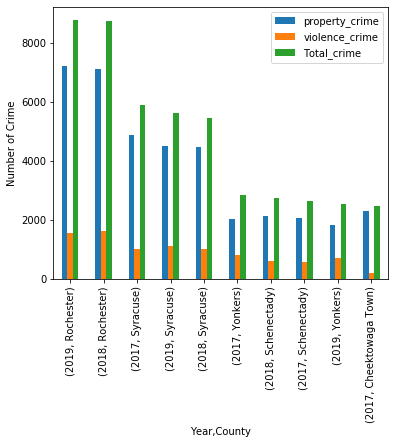

In [17]:
# New York crime data by county and year
county_crime_NY = NY.groupby(['Year','County'])[['property_crime','violence_crime','Total_crime']].agg(np.sum)

county_crime_NY_sort = county_crime_NY.sort_values('Total_crime',ascending=False)

county_crime_NY_sort.head(10).plot(kind='bar',figsize=(6,5))

plt.ylabel('Number of Crime')

In [18]:
# VA stat
VA = report_new[report_new['State']=='Virginia']

VA

,State,County,Year,violence_crime,property_crime,Total_crime,Employed,Unemployed,Income,Rental Price_1 bedroom,Rental Price_2 bedroom,Number of University,Student Count,total_award,total_grad_value,pell_value,retain_value,cohort_size
188,Virginia,Alexandria,2017,262,2490.0,2752.0,53519,1820,75394,2163,2745,1,265,98,54,29,65,34
189,Virginia,Altavista,2017,4,110.0,114.0,6683,321,47794,2163,2745,1,265,98,54,29,65,34
190,Virginia,Amherst,2017,1,12.0,13.0,5961,247,49170,1659,1469,1,265,98,54,29,65,34
191,Virginia,Ashland,2017,31,160.0,191.0,146174,3719,117374,1031,1274,1,1315,62,119,25,77,392
192,Virginia,Big Stone Gap,2017,6,178.0,184.0,36619,1470,61541,1031,1651,1,2924,54,46,47,63,526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Virginia,Winchester,2019,80,662.0,742.0,7409,305,56163,2589,4433,1,2150,65,80,19,76,396
864,Virginia,Windsor,2019,4,23.0,27.0,1498,131,53797,2589,4433,1,2150,65,80,19,76,396
865,Virginia,Wise,2019,3,58.0,61.0,448251,18657,38345,2589,4433,1,2291,59,66,38,71,401
866,Virginia,Woodstock,2019,10,125.0,135.0,22672,705,38345,2589,4433,1,2291,59,66,38,71,401


In [19]:
# VA crime data by year
Year_crime_VA=VA.groupby('Year')[['violence_crime','property_crime','Total_crime']].agg(np.sum)

Year_crime_VA

,violence_crime,property_crime,Total_crime
Year,,,
2017,4850,35960.0,40810.0
2018,6849,50922.0,57771.0
2019,7685,58093.0,65778.0


Text(0, 0.5, 'Number of Crime')

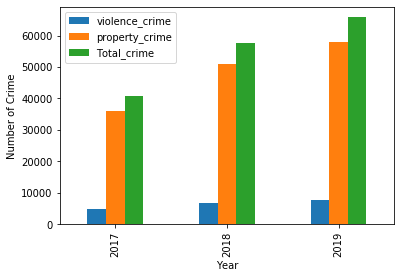

In [20]:
Year_crime_VA.plot(kind='bar')

plt.ylabel('Number of Crime')

Text(0, 0.5, 'Number of Crime')

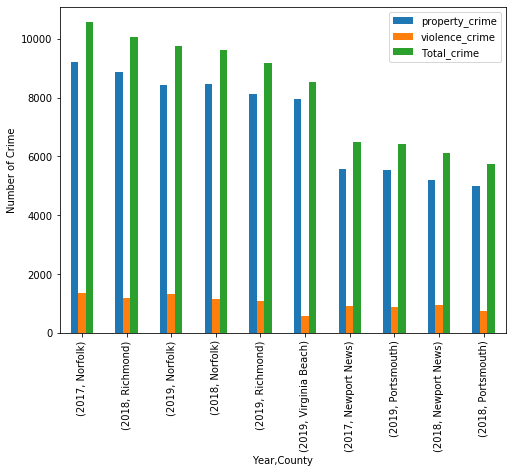

In [21]:
# VA crime data
county_crime_VA = VA.groupby(['Year','County'])[['property_crime','violence_crime','Total_crime']].agg(np.sum)

county_crime_VA_sort = county_crime_VA.sort_values('Total_crime',ascending=False)

county_crime_VA_sort.head(10).plot(kind='bar',figsize=(8,6))

plt.ylabel('Number of Crime')

**Compare between VA and NY**

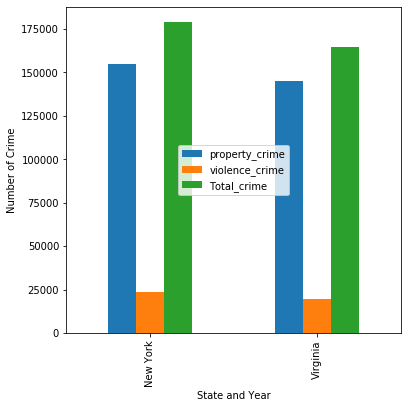

In [22]:
state_crime=report_new.groupby('State')[['property_crime','violence_crime','Total_crime']].agg(np.sum)
state_crime.plot(kind='bar',figsize=(6,6))
plt.xlabel('State and Year')
plt.ylabel('Number of Crime')
plt.legend(loc='center')
plt.show()

In [23]:
# % property_crime and violence_crime
state_crime['%property_crime'] = state_crime['property_crime']/(state_crime['property_crime']+state_crime['violence_crime'])

state_crime['%violence_crime'] = state_crime['violence_crime']/(state_crime['property_crime']+state_crime['violence_crime'])

state_crime

,property_crime,violence_crime,Total_crime,%property_crime,%violence_crime
State,,,,,
New York,155006.0,23665,178671.0,0.867550,0.132450
Virginia,144975.0,19384,164359.0,0.882063,0.117937


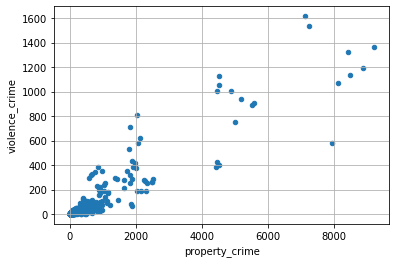

In [24]:
# Correlation between property_crime and violence_crime
report.plot(x='property_crime',y='violence_crime',kind='scatter')
plt.grid()
plt.show()

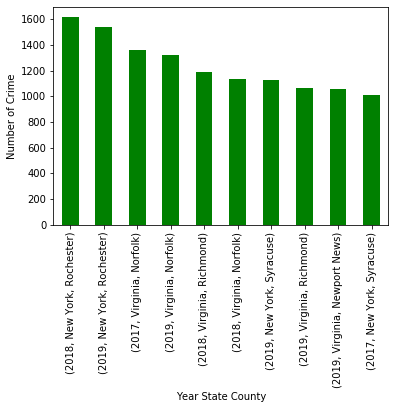

In [25]:
# Top 10 Violence Crimes grouped by state and county
violence_report = report.groupby(['Year','State','County'])['violence_crime'].agg(np.sum)

top_10_violence_crime = violence_report.sort_values(ascending=False)

top_10_violence_crime.head(10).plot(kind='bar',color='green')

plt.xlabel('Year State County')
plt.ylabel('Number of Crime')
plt.show()

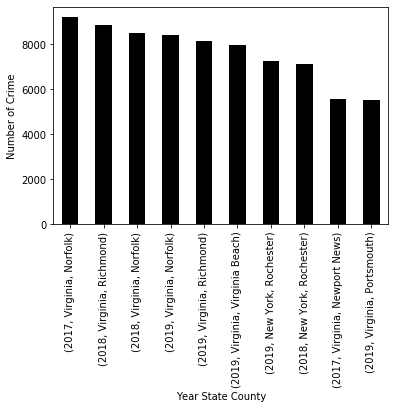

In [26]:
# Top 10 Property Crime by State and County

property_report = report.groupby(['Year','State','County'])['property_crime'].agg(np.sum)

top_10_property_crime = property_report.sort_values(ascending=False)

top_10_property_crime.head(10).plot(kind='bar',color='black')

plt.xlabel('Year State County')
plt.ylabel('Number of Crime')
plt.show()

**We will look at the employment level**

Max employed:15689987
Min employed:10688578
Max unemployed:823093
Min unemployed:532326


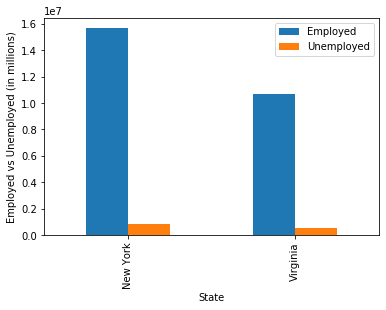

In [27]:
state_employment = report_new.groupby('State')[['Employed','Unemployed']].agg(np.sum)

state_employment.plot(kind='bar')

plt.xlabel('State')
plt.ylabel('Employed vs Unemployed (in millions)')

print(f"Max employed:{state_employment['Employed'].max()}")
print(f"Min employed:{state_employment['Employed'].min()}")

print(f"Max unemployed:{state_employment['Unemployed'].max()}")
print(f"Min unemployed:{state_employment['Unemployed'].min()}")

**Look at New York Data**

In [28]:
Year_Employment_NY = NY.groupby('Year')[['Employed','Unemployed']].agg(np.sum)

Year_Employment_NY

,Employed,Unemployed
Year,,
2017,6669936,254453
2018,4033127,298080
2019,4986924,270560


Text(0, 0.5, 'Number of Employed/Unemployed')

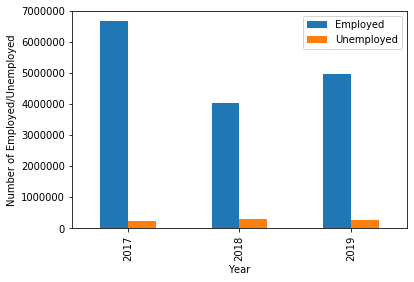

In [29]:
# Look at the total Employed and Unemployed at New York state by year
Year_Employment_NY.plot(kind='bar')

plt.ylabel('Number of Employed/Unemployed')

Text(0, 0.5, 'Number of Employed')

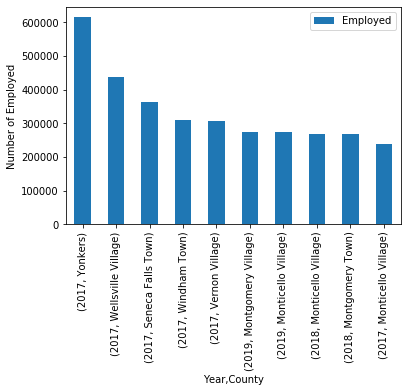

In [30]:
# Top 10 employed rate by year and county
County_Employment_NY = NY.groupby(['Year','County'])[['Employed']].agg(np.sum)

order_NY = County_Employment_NY.sort_values('Employed',ascending=False)

order_NY.head(10).plot(kind='bar')

plt.ylabel('Number of Employed')

**Look at Virginia Data**

In [31]:
Year_Employment_VA = VA.groupby('Year')[['Employed','Unemployed']].agg(np.sum)

Year_Employment_VA

,Employed,Unemployed
Year,,
2017,2629740,132403
2018,3748872,185014
2019,4309966,214909


Text(0, 0.5, 'Number of Employed/Unemployed')

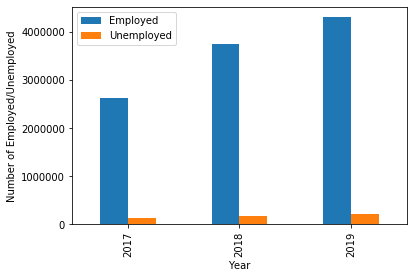

In [32]:
Year_Employment_VA.plot(kind='bar')

plt.ylabel('Number of Employed/Unemployed')

Text(0, 0.5, 'Number of Employed')

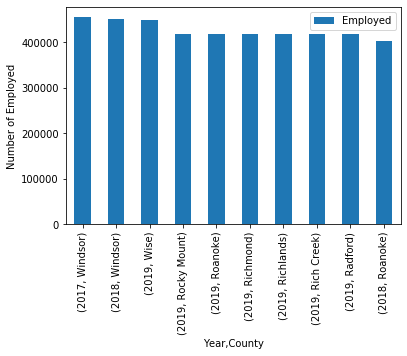

In [33]:
# Top 10 employed rate by year and county
County_Employment_VA = VA.groupby(['Year','County'])[['Employed']].agg(np.sum)

order_VA = County_Employment_VA.sort_values('Employed',ascending=False)

order_VA.head(10).plot(kind='bar')

plt.ylabel('Number of Employed')

**Let Look at House Price and Income Level**

Year  State   
2017  New York    59727.607527
      Virginia    53969.080645
2018  New York    60629.923445
      Virginia    55649.397590
2019  New York    59828.910314
      Virginia    55369.368421
Name: Income, dtype: float64


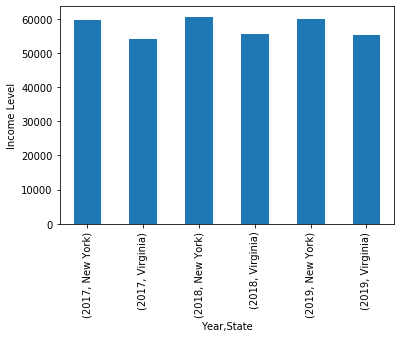

In [34]:
average_income = report_new.groupby(['Year','State'])['Income'].agg(np.mean)

print(average_income)

average_income.plot(kind='bar')
plt.ylabel('Income Level')
plt.show()

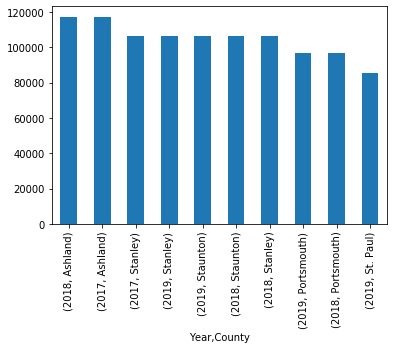

In [35]:
#VA average income by county
VA_average_income=VA.groupby(['Year','County'])['Income'].agg(np.mean)

VA_average_income.sort_values(ascending=False).head(10).plot(kind='bar')

C:\Users\namdo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Number of Income_threshol > 50k')

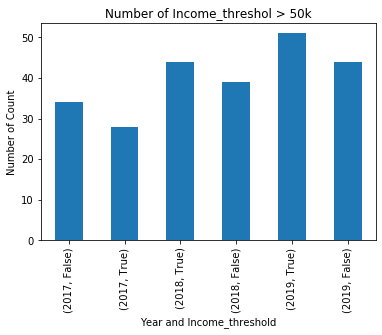

In [36]:
VA['Income_threshold'] = VA['Income'] > 50000

VA.groupby('Year')['Income_threshold'].value_counts().plot(kind='bar')

plt.xlabel('Year and Income_threshold')
plt.ylabel('Number of Count')
plt.title('Number of Income_threshol > 50k')

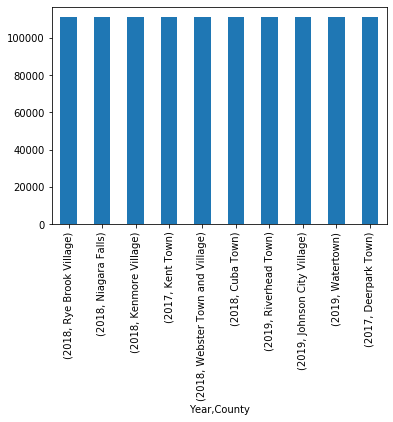

In [37]:
#NY average income by county
NY_average_income=NY.groupby(['Year','County'])['Income'].agg(np.mean)

NY_average_income.sort_values(ascending=False).head(10).plot(kind='bar')

               Rental Price_1 bedroom  Rental Price_2 bedroom
Year State                                                   
2017 New York             1831.956989             2128.591398
     Virginia             1840.612903             2307.306452
2018 New York             1703.492823             2027.277512
     Virginia             1776.457831             2244.156627
2019 New York             1735.757848             1942.991031
     Virginia             1837.968421             2322.073684


C:\Users\namdo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


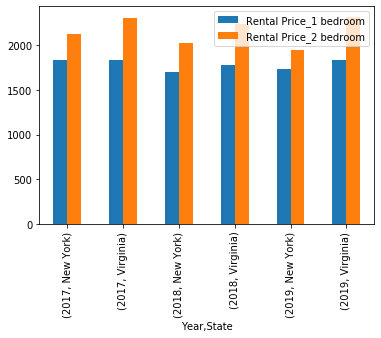

In [38]:
average_rental_1_bed = report_new.groupby(['Year','State'])['Rental Price_1 bedroom','Rental Price_2 bedroom'].agg(np.mean)

print(average_rental_1_bed)

average_rental_1_bed.plot(kind='bar')

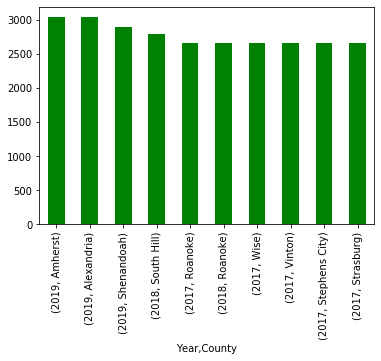

In [39]:
#VA housing
# Top 10 high rent
VA_average_1_bedroom = VA.groupby(['Year','County'])['Rental Price_1 bedroom'].agg(np.mean)

VA_average_1_bedroom.sort_values(ascending=False).head(10).plot(kind='bar',color='green')



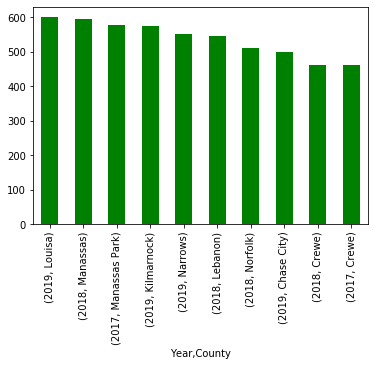

In [40]:
# Top 10 low rent
VA_average_1_bedroom.sort_values(ascending=False).tail(10).plot(kind='bar',color='green')


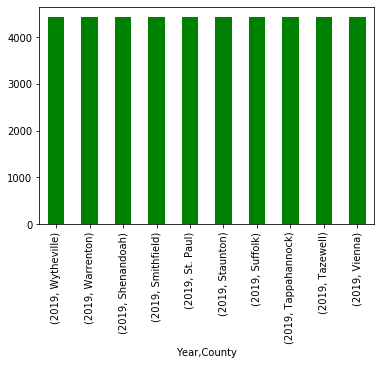

In [41]:
# Top 10 high rent
VA_average_2_bedroom = VA.groupby(['Year','County'])['Rental Price_2 bedroom'].agg(np.mean)

VA_average_2_bedroom.sort_values(ascending=False).head(10).plot(kind='bar',color='green')


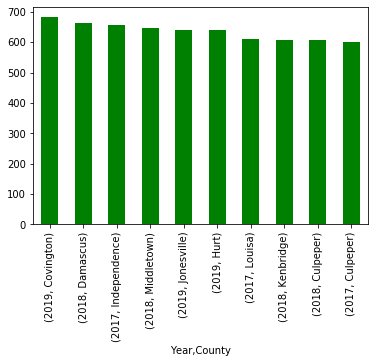

In [42]:
# Top 10 low rent

VA_average_2_bedroom.sort_values(ascending=False).tail(10).plot(kind='bar',color='green')

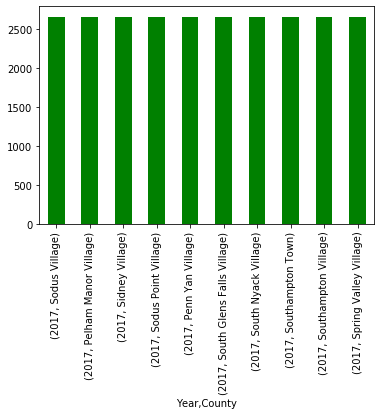

In [43]:
# NY housing
# Top 10 high rent
NY_average_1_bedroom = NY.groupby(['Year','County'])['Rental Price_1 bedroom'].agg(np.mean)

NY_average_1_bedroom.sort_values(ascending=False).head(10).plot(kind='bar',color='green')


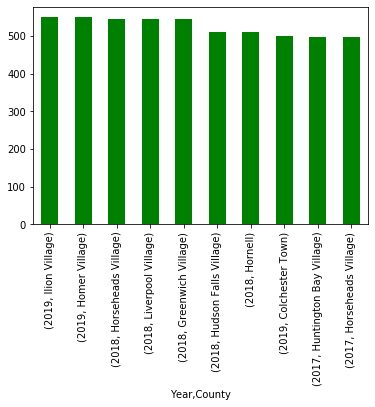

In [44]:
# Top 10 low rent
NY_average_1_bedroom.sort_values(ascending=False).tail(10).plot(kind='bar',color='green')

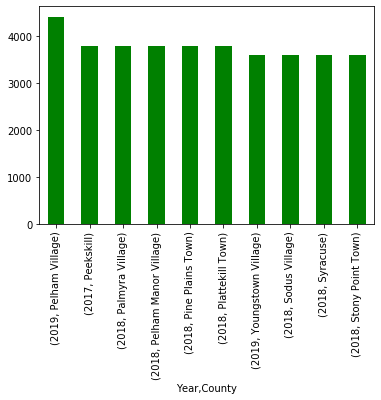

In [45]:
# Top 10 high rent
NY_average_2_bedroom = NY.groupby(['Year','County'])['Rental Price_2 bedroom'].agg(np.mean)

NY_average_2_bedroom.sort_values(ascending=False).head(10).plot(kind='bar',color='green')

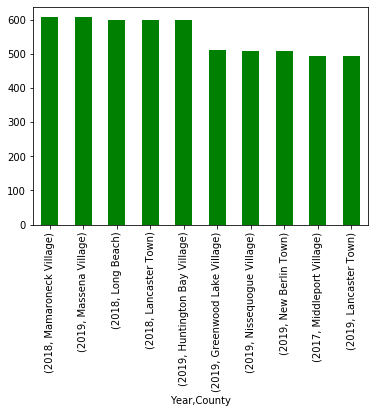

In [46]:
# Top 10 low rent
NY_average_2_bedroom.sort_values(ascending=False).tail(10).plot(kind='bar',color='green')

**Let look at the Education data**

In [47]:
report_education = report_new[['State','County','Year','Number of University','Student Count','total_award','total_grad_value','pell_value','retain_value','cohort_size']]

report_education

,State,County,Year,Number of University,Student Count,total_award,total_grad_value,pell_value,retain_value,cohort_size
0,New York,Canajoharie Village,2017,9,52366,604,552,449,493,8586
1,New York,Canisteo Village,2017,1,6389,55,42,41,49,1472
2,New York,Cape Vincent Village,2017,2,5926,141,209,74,165,704
3,New York,Carroll Town,2017,2,5926,141,209,74,165,704
4,New York,Carthage Village,2017,2,5926,141,209,74,165,704
...,...,...,...,...,...,...,...,...,...,...
863,Virginia,Winchester,2019,1,2150,65,80,19,76,396
864,Virginia,Windsor,2019,1,2150,65,80,19,76,396
865,Virginia,Wise,2019,1,2291,59,66,38,71,401
866,Virginia,Woodstock,2019,1,2291,59,66,38,71,401


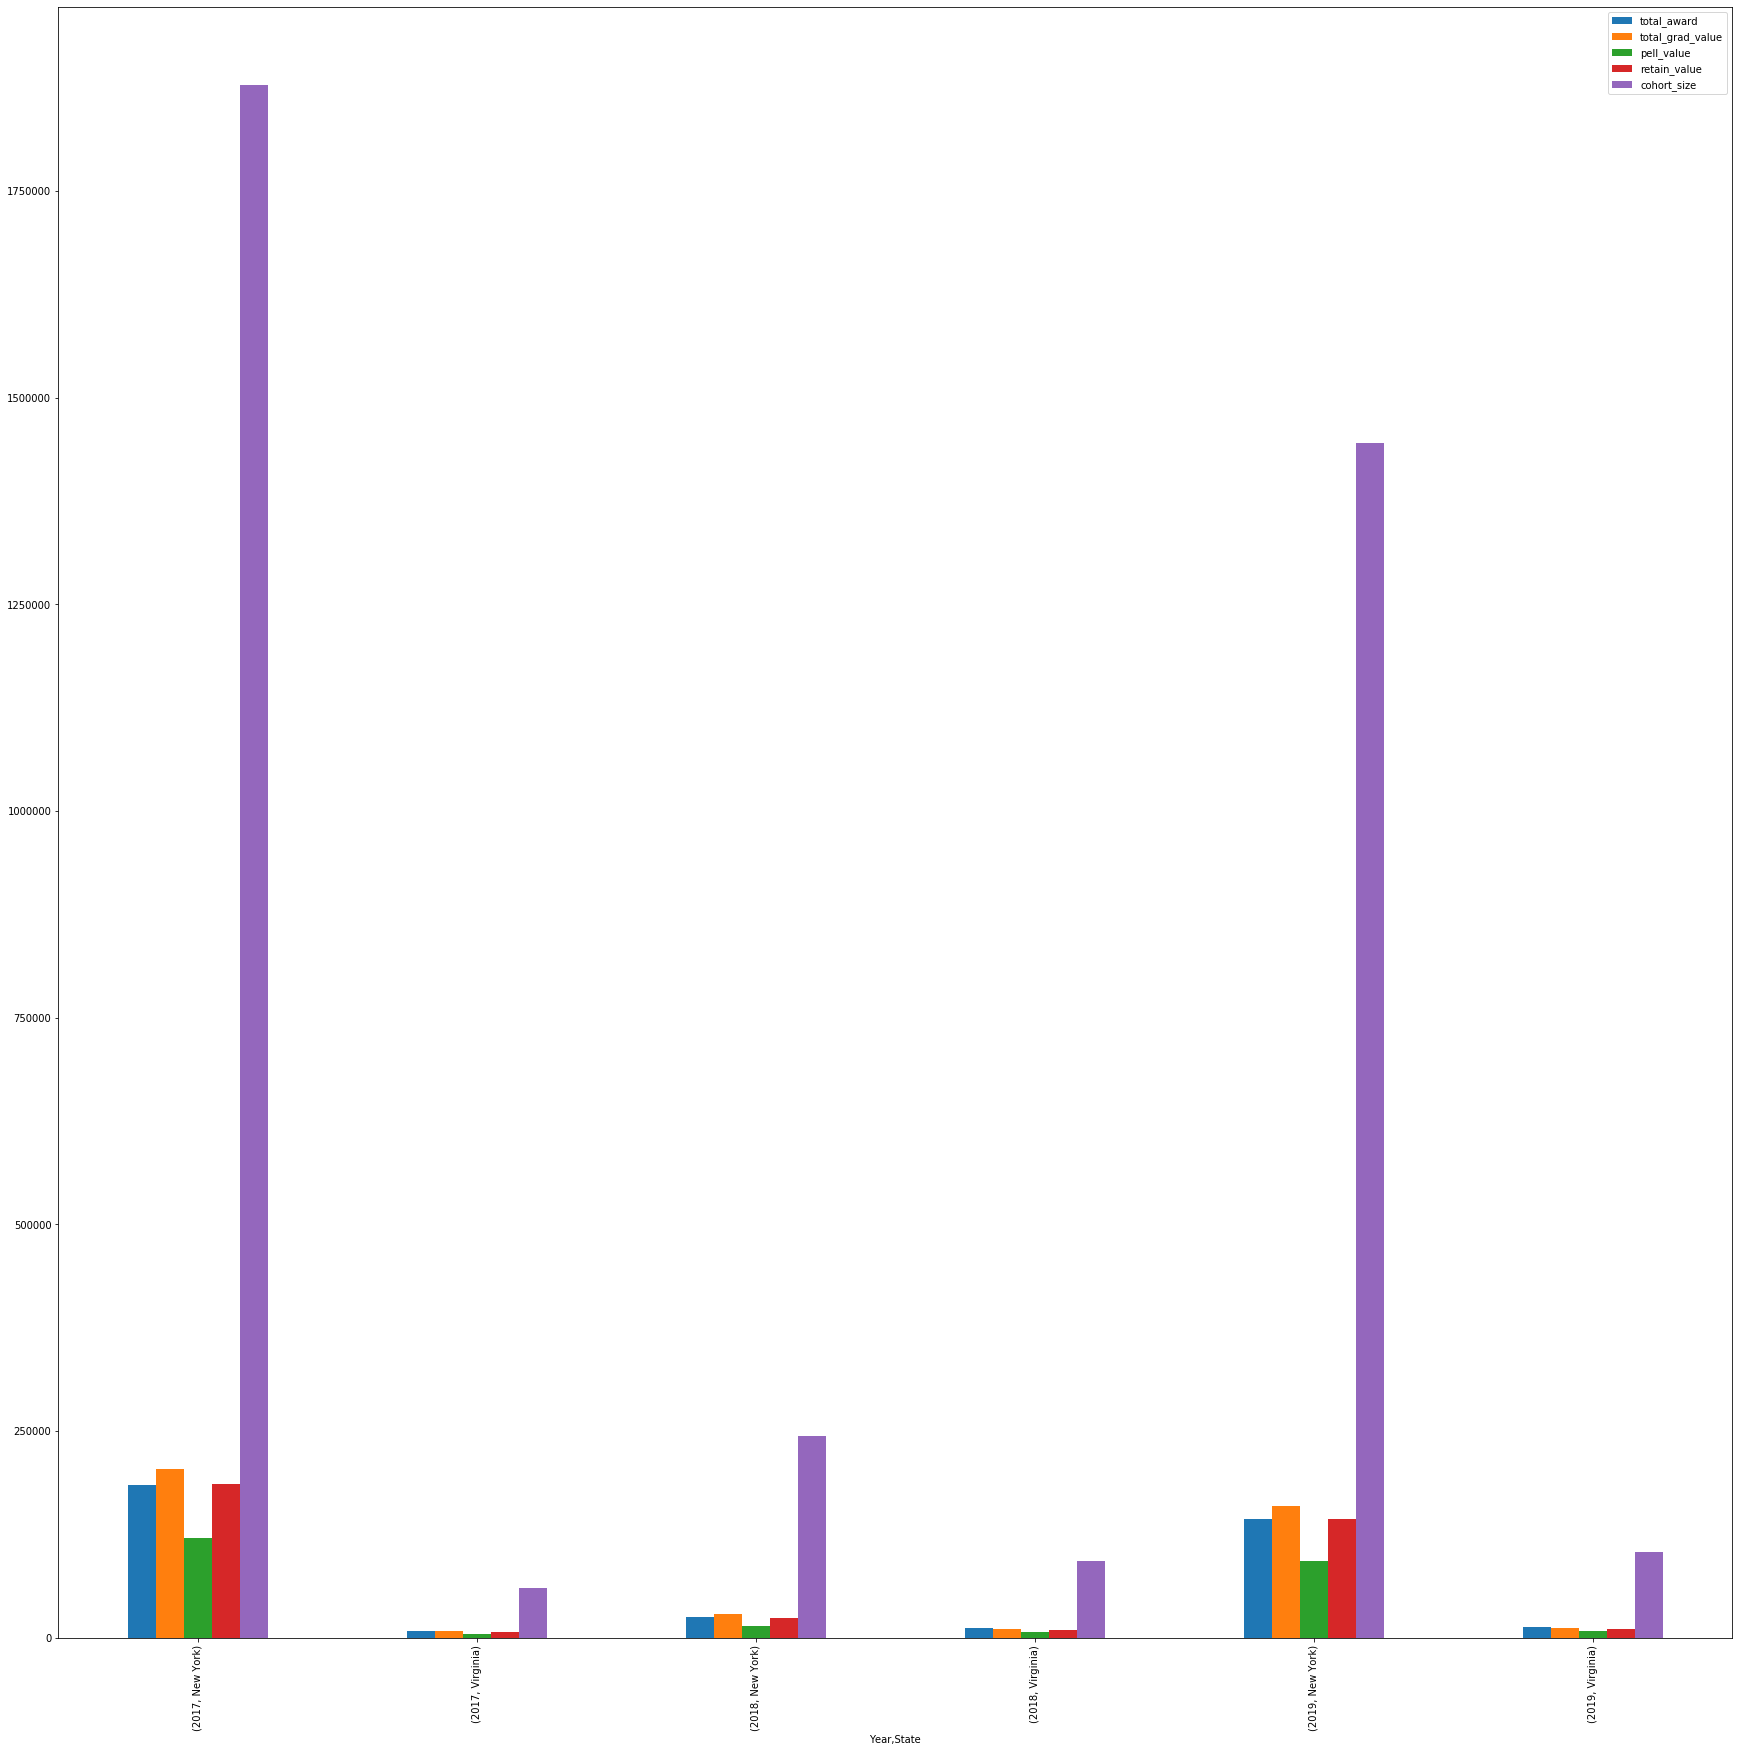

In [48]:
award_state=report_education.groupby(['Year','State'])[['total_award','total_grad_value','pell_value','retain_value','cohort_size']].agg(np.sum)

award_state.plot(kind='bar',figsize=(30,30))

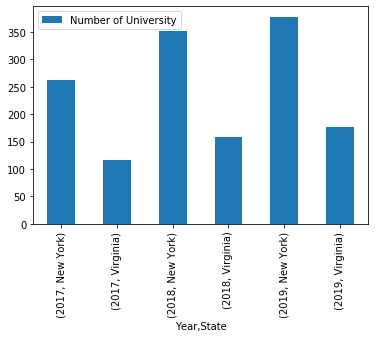

In [49]:
university_state=report_education.groupby(['Year','State'])[['Number of University']].agg(np.sum)

university_state.plot(kind='bar')

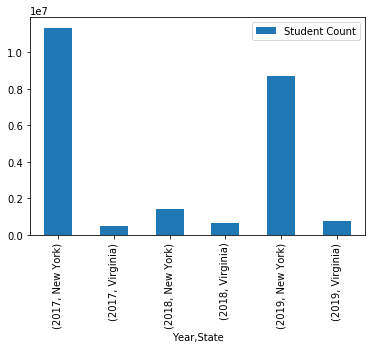

In [50]:
student_state=report_education.groupby(['Year','State'])[['Student Count']].agg(np.sum)

student_state.plot(kind='bar')

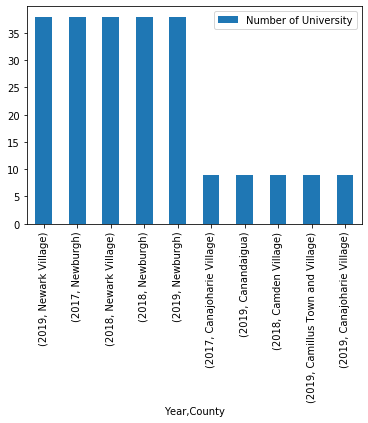

In [51]:
# Look at New York education
education_NY=report_education[report_education['State']=='New York']

County_NY=education_NY.groupby(['Year','County'])[['Number of University']].agg(np.sum)

County_NY.sort_values('Number of University',ascending=False).head(10).plot(kind='bar')


In [52]:
student_NY=education_NY.groupby(['Year','County'])[['Student Count']].agg(np.sum)

student_NY.sort_values('Student Count',ascending=False).head(10)

Student Count
Year County                           
2019 Youngstown Village        1020733
2017 Youngstown Village        1020733
     Whitestown Town           1020733
     Windham Town              1020733
     Wolcott Village           1020733
     Woodbury Town             1020733
     Woodstock Town            1020733
     Yonkers                   1020733
     Yorktown Town             1020733
     Yorkville Village         1020733

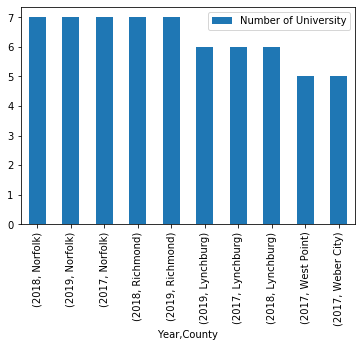

In [53]:
# Look at VA education
education_VA=report_education[report_education['State']=='Virginia']

County_VA=education_VA.groupby(['Year','County'])[['Number of University']].agg(np.sum)

County_VA.sort_values('Number of University',ascending=False).head(10).plot(kind='bar')

In [54]:
student_VA=education_VA.groupby(['Year','County'])[['Student Count']].agg(np.sum)

student_VA.sort_values('Student Count',ascending=False).head(10)

Student Count
Year County                   
2019 Norfolk             57569
2017 Norfolk             57569
2018 Norfolk             57569
     Lynchburg           56002
2019 Lynchburg           56002
2017 Lynchburg           56002
2019 Appalachia          52151
     Richmond            38836
2018 Richmond            38836
2019 Blacksburg          24034

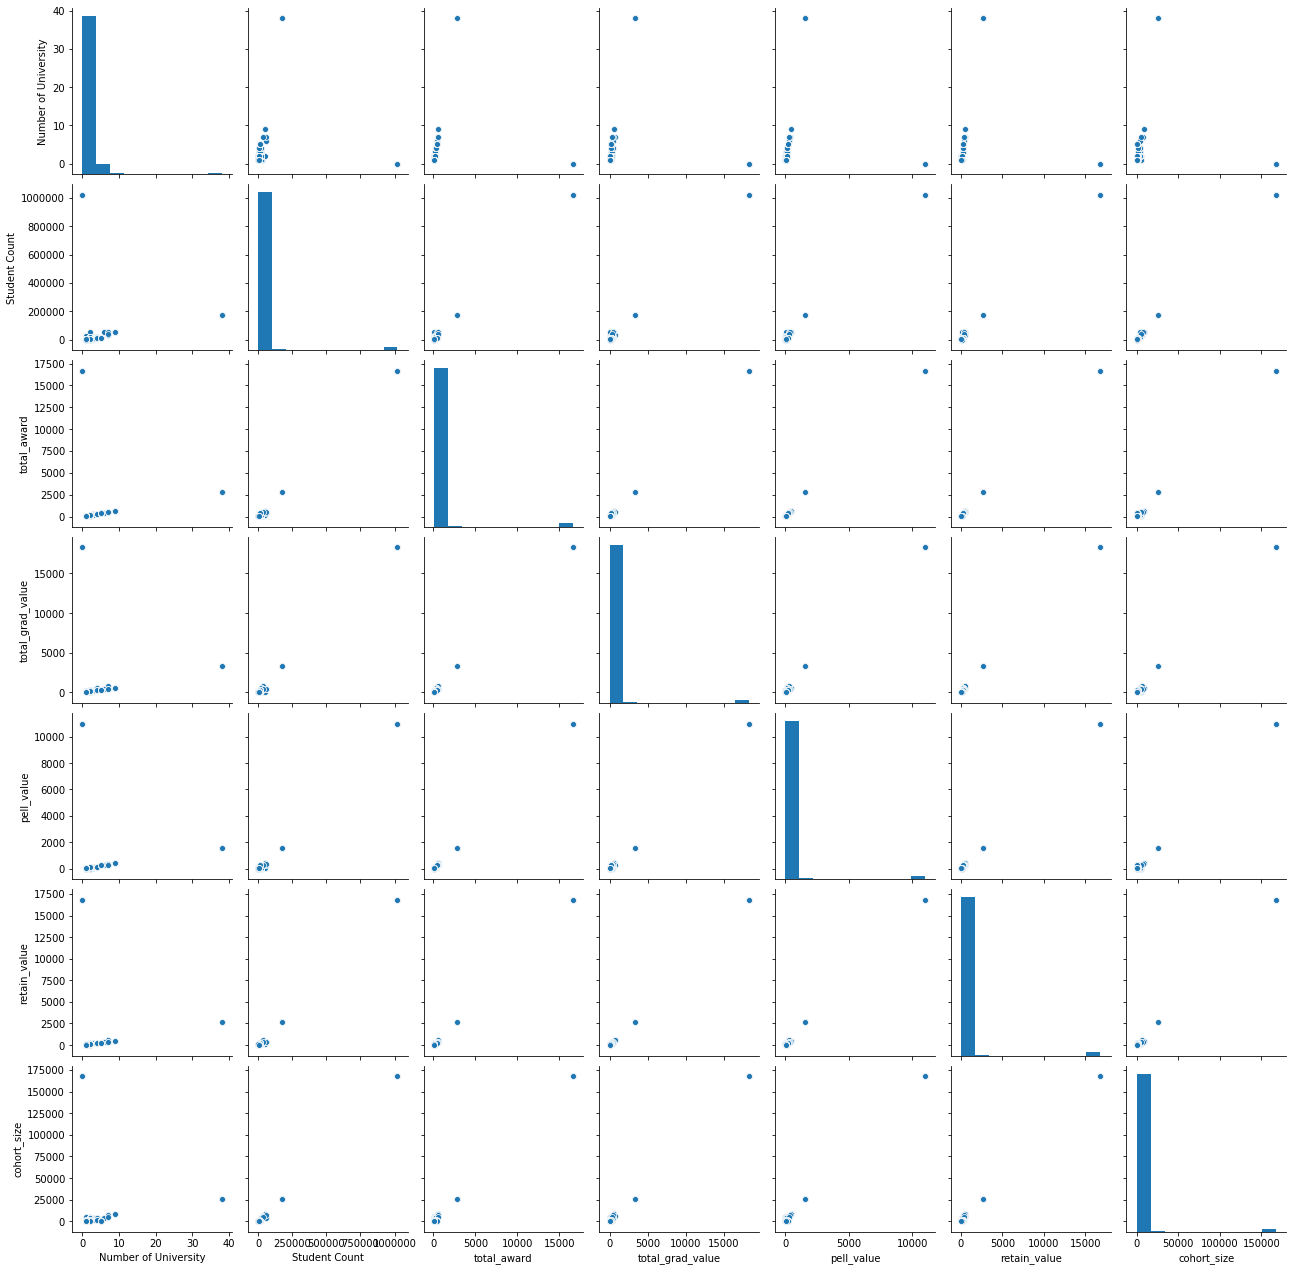

In [55]:
sns.pairplot(report_education,vars=['Number of University','Student Count','total_award','total_grad_value','pell_value','retain_value','cohort_size'])

In [56]:
report_education.corr()

,Year,Number of University,Student Count,total_award,total_grad_value,pell_value,retain_value,cohort_size
Year,1.000000,0.027791,-0.043133,-0.042832,-0.042256,-0.043243,-0.042936,-0.043318
Number of University,0.027791,1.000000,0.022200,0.019411,0.024412,0.006007,0.009301,0.008720
Student Count,-0.043133,0.022200,1.000000,0.998901,0.998871,0.998581,0.998980,0.999630
total_award,-0.042832,0.019411,0.998901,1.000000,0.999636,0.999761,0.999778,0.998528
total_grad_value,-0.042256,0.024412,0.998871,0.999636,1.000000,0.999048,0.999715,0.998737
pell_value,-0.043243,0.006007,0.998581,0.999761,0.999048,1.000000,0.999584,0.998264
retain_value,-0.042936,0.009301,0.998980,0.999778,0.999715,0.999584,1.000000,0.998904
cohort_size,-0.043318,0.008720,0.999630,0.998528,0.998737,0.998264,0.998904,1.000000


In [57]:
X = report_education[['total_award','total_grad_value','pell_value','retain_value','cohort_size']]

y = report_education['Student Count']

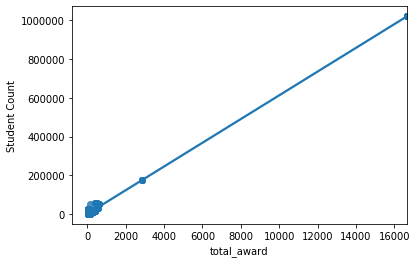

In [58]:
# total_award vs student count
sns.regplot(x=report_education['total_award'],y=y,data=report_education)

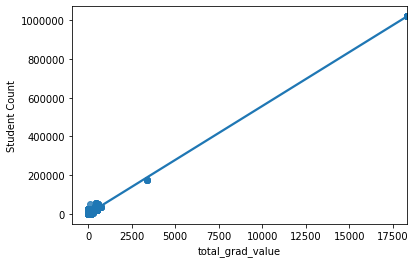

In [59]:
# total grad value vs student count
sns.regplot(x=report_education['total_grad_value'],y=y,data=report_education)

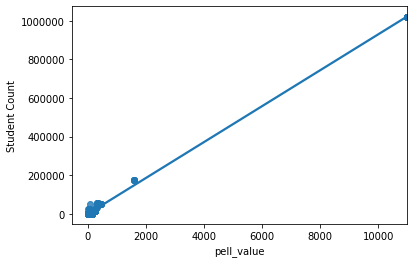

In [60]:
# pell value vs student count
sns.regplot(x=report_education['pell_value'],y=y,data=report_education)

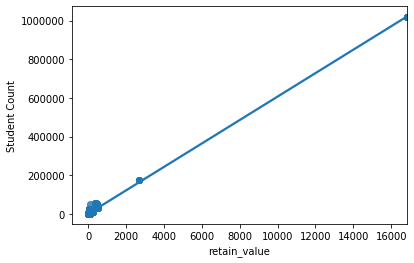

In [61]:
# retain value vs student count
sns.regplot(x=report_education['retain_value'],y=y,data=report_education)

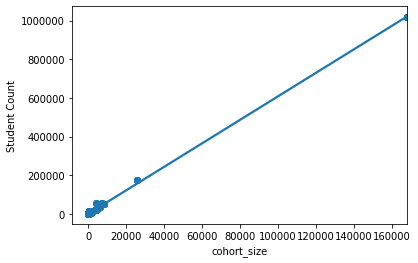

In [62]:
#cohort size vs student count
sns.regplot(x=report_education['cohort_size'],y=y,data=report_education)

**Prepare Data for Machine Learning**

In [63]:
reporting = report_new.drop(columns=['State','County','Year'])

In [64]:
from sklearn.cluster import KMeans

In [65]:
X = reporting.iloc[:,:].values

In [66]:
#k=2:
kmeans2=KMeans(n_clusters=2)
model=kmeans2.fit(X)

In [67]:
kmeans2.cluster_centers_

array([[4.93341260e+01, 3.50136742e+02, 3.99470868e+02, 2.99641510e+04,
        1.57981807e+03, 5.85800155e+04, 1.75462901e+03, 2.07069084e+03,
        1.71343639e+00, 7.17647444e+03, 1.21707491e+02, 1.32151011e+02,
        7.21973841e+01, 1.12781213e+02, 1.15441974e+03],
       [9.17058824e+01, 3.24470588e+02, 4.16176471e+02, 6.93361176e+04,
        1.57600000e+03, 6.36538824e+04, 2.61035294e+03, 3.61000000e+03,
        2.22044605e-16, 1.02073300e+06, 1.66520000e+04, 1.82950000e+04,
        1.09840000e+04, 1.68230000e+04, 1.67788000e+05]])

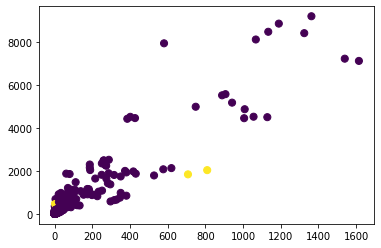

In [68]:
y_kmeans=model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

In [69]:
kmeans2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
report_new

,State,County,Year,violence_crime,property_crime,Total_crime,Employed,Unemployed,Income,Rental Price_1 bedroom,Rental Price_2 bedroom,Number of University,Student Count,total_award,total_grad_value,pell_value,retain_value,cohort_size
0,New York,Canajoharie Village,2017,0,16.0,16.0,4524,2486,58743,876,1133,9,52366,604,552,449,493,8586
1,New York,Canisteo Village,2017,0,8.0,8.0,4524,2486,54114,1031,1554,1,6389,55,42,41,49,1472
2,New York,Cape Vincent Village,2017,0,4.0,4.0,4524,2486,55765,2194,1554,2,5926,141,209,74,165,704
3,New York,Carroll Town,2017,0,0.0,0.0,4524,2486,57914,1031,1414,2,5926,141,209,74,165,704
4,New York,Carthage Village,2017,7,57.0,64.0,30530,1012,54343,685,832,2,5926,141,209,74,165,704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Virginia,Winchester,2019,80,662.0,742.0,7409,305,56163,2589,4433,1,2150,65,80,19,76,396
864,Virginia,Windsor,2019,4,23.0,27.0,1498,131,53797,2589,4433,1,2150,65,80,19,76,396
865,Virginia,Wise,2019,3,58.0,61.0,448251,18657,38345,2589,4433,1,2291,59,66,38,71,401
866,Virginia,Woodstock,2019,10,125.0,135.0,22672,705,38345,2589,4433,1,2291,59,66,38,71,401


In [71]:
ML_report = report_new.drop(columns=['violence_crime','property_crime','Unemployed'])

In [72]:
ML_report

,State,County,Year,Total_crime,Employed,Income,Rental Price_1 bedroom,Rental Price_2 bedroom,Number of University,Student Count,total_award,total_grad_value,pell_value,retain_value,cohort_size
0,New York,Canajoharie Village,2017,16.0,4524,58743,876,1133,9,52366,604,552,449,493,8586
1,New York,Canisteo Village,2017,8.0,4524,54114,1031,1554,1,6389,55,42,41,49,1472
2,New York,Cape Vincent Village,2017,4.0,4524,55765,2194,1554,2,5926,141,209,74,165,704
3,New York,Carroll Town,2017,0.0,4524,57914,1031,1414,2,5926,141,209,74,165,704
4,New York,Carthage Village,2017,64.0,30530,54343,685,832,2,5926,141,209,74,165,704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Virginia,Winchester,2019,742.0,7409,56163,2589,4433,1,2150,65,80,19,76,396
864,Virginia,Windsor,2019,27.0,1498,53797,2589,4433,1,2150,65,80,19,76,396
865,Virginia,Wise,2019,61.0,448251,38345,2589,4433,1,2291,59,66,38,71,401
866,Virginia,Woodstock,2019,135.0,22672,38345,2589,4433,1,2291,59,66,38,71,401


In [73]:
average = {'Total_crime':[ML_report['Total_crime'].mean()],
          'Employed':[ML_report['Employed'].mean()],
          'Income':[ML_report['Income'].mean()],
          'Rental Price_1 Bedroom':[ML_report['Rental Price_1 bedroom'].mean()],
          'Rental Price_2 Bedroom':[ML_report['Rental Price_2 bedroom'].mean()],
          'Number of University':[ML_report['Number of University'].mean()],
          'Student Count':[ML_report['Student Count'].mean()],
          'total_award':[ML_report['total_award'].mean()],
          'total_grad_value':[ML_report['total_grad_value'].mean()],
          'pell_value':[ML_report['pell_value'].mean()],
          'retain_value':[ML_report['retain_value'].mean()],
          'cohort_size':[ML_report['cohort_size'].mean()]}

pd.DataFrame(data=average)

,Total_crime,Employed,Income,Rental Price_1 Bedroom,Rental Price_2 Bedroom,Number of University,Student Count,total_award,total_grad_value,pell_value,retain_value,cohort_size
0,399.801865,30744.248252,58680.54662,1771.583916,2101.189977,1.679487,27258.596737,449.230769,492.020979,288.398601,443.869464,4456.017483


In [74]:
ML_report['Level_1'] = ML_report['Total_crime'] >= ML_report['Total_crime'].mean()
ML_report['Level_2'] = ML_report['Employed'] >= ML_report['Employed'].mean()
ML_report['Level_3'] = ML_report['Income'] >= ML_report['Income'].mean()
ML_report['Level_4'] = ML_report['Rental Price_1 bedroom'] >= ML_report['Rental Price_1 bedroom'].mean()
ML_report['Level_5'] = ML_report['Rental Price_2 bedroom'] >= ML_report['Rental Price_2 bedroom'].mean()
ML_report['Level_6'] = ML_report['Number of University'] >= ML_report['Number of University']
ML_report['Level_7'] = ML_report['Student Count'] >= ML_report['Student Count'].mean()
ML_report['Level_8'] = ML_report['total_award'] >= ML_report['total_award'].mean()
ML_report['Level_9'] = ML_report['total_grad_value'] >= ML_report['total_grad_value'].mean()
ML_report['Level_10'] = ML_report['pell_value'] >= ML_report['pell_value'].mean()
ML_report['Level_11'] = ML_report['retain_value'] >= ML_report['retain_value'].mean()
ML_report['Level_12'] = ML_report['cohort_size'] >= ML_report['cohort_size'].mean()

In [75]:
# 0 = Not Move and 1 = Move
def rank(row):
    if row['Level_1'] == True:
        return 0
    elif row['Level_3'] == False:
        return 0
    elif row['Level_4'] == True:
        return 0
    elif row['Level_5'] == True:
        return 0
    elif row['Level_12'] == True:
        return 0
    else:
        return 1

In [76]:
ML_report['Rank'] = ML_report.apply(lambda row: rank(row),axis=1)

ML_report.iloc[:,15:29].head(5)

,Level_1,Level_2,Level_3,Level_4,Level_5,Level_6,Level_7,Level_8,Level_9,Level_10,Level_11,Level_12,Rank
0,False,False,True,False,False,True,True,True,True,True,True,True,0
1,False,False,False,False,False,True,False,False,False,False,False,False,0
2,False,False,False,True,False,True,False,False,False,False,False,False,0
3,False,False,False,False,False,True,False,False,False,False,False,False,0
4,False,False,False,False,False,True,False,False,False,False,False,False,0


0    765
1     93
Name: Rank, dtype: int64


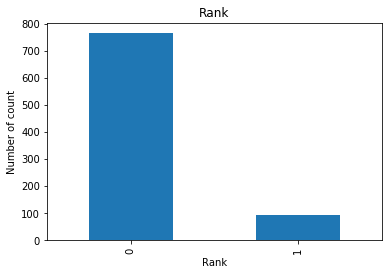

In [77]:
# 1 = Move and 0 = Not Move
ML_report['Rank'].value_counts().plot(kind='bar')
plt.xlabel('Rank')
plt.ylabel('Number of count')
plt.title('Rank')
print(ML_report['Rank'].value_counts())

In [78]:
Final_report = ML_report.drop(columns=['Level_1','Level_2','Level_3','Level_4','Level_5','Level_6','Level_7','Level_8','Level_9','Level_10','Level_11','Level_12'])
Final_report

,State,County,Year,Total_crime,Employed,Income,Rental Price_1 bedroom,Rental Price_2 bedroom,Number of University,Student Count,total_award,total_grad_value,pell_value,retain_value,cohort_size,Rank
0,New York,Canajoharie Village,2017,16.0,4524,58743,876,1133,9,52366,604,552,449,493,8586,0
1,New York,Canisteo Village,2017,8.0,4524,54114,1031,1554,1,6389,55,42,41,49,1472,0
2,New York,Cape Vincent Village,2017,4.0,4524,55765,2194,1554,2,5926,141,209,74,165,704,0
3,New York,Carroll Town,2017,0.0,4524,57914,1031,1414,2,5926,141,209,74,165,704,0
4,New York,Carthage Village,2017,64.0,30530,54343,685,832,2,5926,141,209,74,165,704,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Virginia,Winchester,2019,742.0,7409,56163,2589,4433,1,2150,65,80,19,76,396,0
864,Virginia,Windsor,2019,27.0,1498,53797,2589,4433,1,2150,65,80,19,76,396,0
865,Virginia,Wise,2019,61.0,448251,38345,2589,4433,1,2291,59,66,38,71,401,0
866,Virginia,Woodstock,2019,135.0,22672,38345,2589,4433,1,2291,59,66,38,71,401,0


**The process of Training and Testing Data with Machine Learning**

**I will apply Naive Bayes, KNearestNeighbor, Decision Tree, Support Vector Machine, and Logistic Regression on this data**

**Support Vector Machine**

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [80]:
enc=OneHotEncoder()
X = Final_report.iloc[:,4:15]
Y = Final_report['Rank']

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [82]:
model_SVM = SGDClassifier()
model_SVM.fit(X_train,y_train)

SGDClassifier()

In [83]:
pred_SVM = model_SVM.predict(X_test)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, roc_auc_score

In [85]:
print(f'accuracy_SVM:{accuracy_score(pred_SVM,y_test)*100}')
print(f"precision_SVM:{precision_score(pred_SVM,y_test,average='macro')*100}")
print(f"recall_SVM:{recall_score(pred_SVM,y_test,average='macro')*100}")
print(f"f1_SVM:{f1_score(pred_SVM,y_test,average='macro')*100}")

accuracy_SVM:59.30232558139535
precision_SVM:56.602972399150744
recall_SVM:52.168456282247945
f1_SVM:45.736434108527135


In [86]:
print(classification_report(pred_SVM,y_test))

              precision    recall  f1-score   support

           0       0.60      0.93      0.73       101
           1       0.53      0.11      0.19        71

    accuracy                           0.59       172
   macro avg       0.57      0.52      0.46       172
weighted avg       0.57      0.59      0.50       172



1. Precision

•	94% of "Not Move" was predicted correctly

•	13% of "Move" was predicted correctly

2. Recall

•	92% of positive "Not Move" was caught

•	18% of positive "Move" was caught

3. F1-Score

•	93% "Not Move" of positive prediction was correct

•	15% "Move" of positive prediction was correct


[]

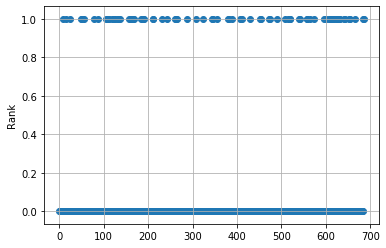

In [87]:
X_train1=np.arange(0,len(X_train),1)
X_test1=np.arange(0,len(X_test),1)

plt.scatter(X_train1,y_train)
plt.ylabel('Rank')
plt.grid()
plt.plot()

Text(0.5, 1.0, 'Prediction Based on SVM')

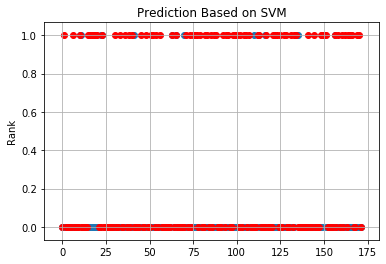

In [88]:
plt.scatter(X_test1,y_test)
plt.scatter(X_test1,pred_SVM,color='r')
plt.ylabel('Rank')
plt.grid()
plt.plot()
plt.title('Prediction Based on SVM')

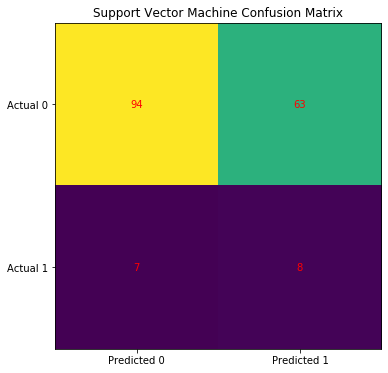

In [89]:
cm = confusion_matrix(y_test,pred_SVM)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0','Predicted 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0','Actual 1'))
ax.set_title('Support Vector Machine Confusion Matrix')

ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

Area under the ROC curve: 0.566


C:\Users\namdo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


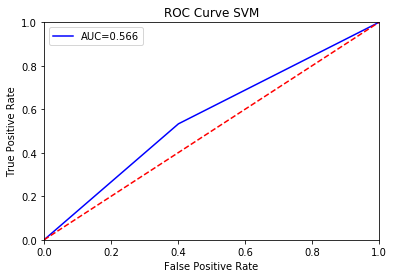

In [90]:
#Get data to plot ROC curve:
fp, tp, th = roc_curve(y_test, pred_SVM)
roc_auc_svm = auc(fp, tp)

# Plot ROC Curve
plt.title('ROC Curve SVM')
plt.plot(fp, tp, 'b',
label='AUC=%0.3f'%roc_auc_svm)
plt.legend(loc='lower_right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('Area under the ROC curve: {:.3f}'.format(roc_auc_svm))

**Logistic Regression**

In [91]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

C:\Users\namdo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [92]:
pred_log = model_log.predict(X_test)

In [93]:
print(f'accuracy_log:{accuracy_score(pred_log,y_test)*100}')
print(f"precision_log:{precision_score(pred_log,y_test,average='macro')*100}")
print(f"recall_log:{recall_score(pred_log,y_test,average='macro')*100}")
print(f"f1_log:{f1_score(pred_log,y_test,average='macro')*100}")

accuracy_log:91.27906976744185
precision_log:65.07430997876857
recall_log:71.91358024691358
f1_log:67.64890282131661


In [94]:
print(classification_report(pred_log,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       162
           1       0.33      0.50      0.40        10

    accuracy                           0.91       172
   macro avg       0.65      0.72      0.68       172
weighted avg       0.93      0.91      0.92       172



1. Precision

•	97% of "Not Move" was predicted correctly

•	33% of "Move" was predicted correctly

2. Recall

•	94% of positive "Not Move" was caught

•	50% of positive "Move" was caught

3. F1-Score

•	95% "Not Move" of positive prediction was correct

•	40% "Move" of positive prediction was correct


Text(0.5, 1.0, 'Prediction Based on LogisticRegression')

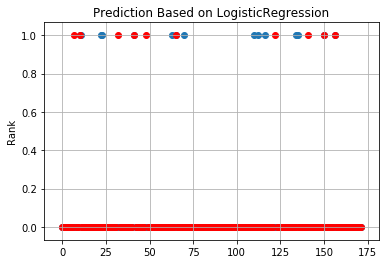

In [95]:
plt.scatter(X_test1,y_test)
plt.scatter(X_test1,pred_log,c='r')
plt.ylabel('Rank')
plt.grid()
plt.plot()
plt.title('Prediction Based on LogisticRegression')

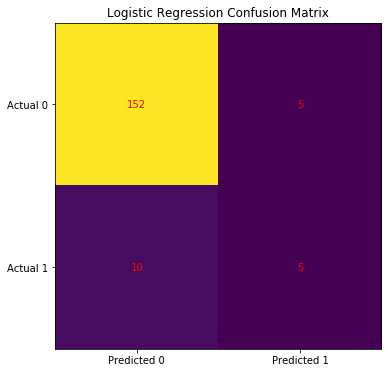

In [96]:
cm = confusion_matrix(y_test,pred_log)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0','Predicted 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0','Actual 1'))
ax.set_title('Logistic Regression Confusion Matrix')

ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

C:\Users\namdo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


Area under the ROC curve: 0.651


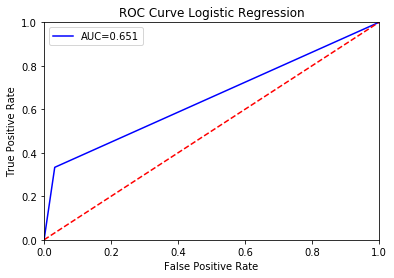

In [97]:
#Get data to plot ROC curve:
fp, tp, th = roc_curve(y_test, pred_log)
roc_auc_log = auc(fp, tp)

# Plot ROC Curve
plt.title('ROC Curve Logistic Regression')
plt.plot(fp, tp, 'b',
label='AUC=%0.3f'%roc_auc_log)
plt.legend(loc='lower_right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('Area under the ROC curve: {:.3f}'.format(roc_auc_log))

**KNearestNeighbor**

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [100]:
pred_knn=model_knn.predict(X_test)

In [101]:
print(f'accuracy_knn:{accuracy_score(pred_knn,y_test)*100}')
print(f"precision_knn:{precision_score(pred_knn,y_test,average='macro')*100}")
print(f"recall_knn:{recall_score(pred_knn,y_test,average='macro')*100}")
print(f"f1_knn:{f1_score(pred_knn,y_test,average='macro')*100}")

accuracy_knn:87.79069767441861
precision_knn:60.14861995753715
recall_knn:60.80470162748644
f1_knn:60.45977011494252


In [102]:
print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       158
           1       0.27      0.29      0.28        14

    accuracy                           0.88       172
   macro avg       0.60      0.61      0.60       172
weighted avg       0.88      0.88      0.88       172



1. Precision

•	94% of "Not Move" was predicted correctly

•	27% of "Move" was predicted correctly

2. Recall

•	93% of positive "Not Move" was caught

•	29% of positive "Move" was caught

3. F1-Score

•	93% "Not Move" of positive prediction was correct

•	28% "Move" of positive prediction was correct


Text(0.5, 1.0, 'Prediction Based on KNearestNeighbor')

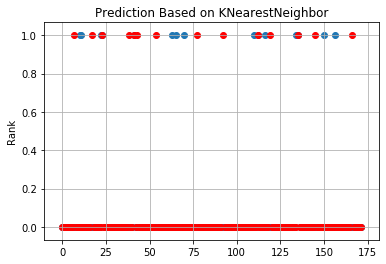

In [103]:
plt.scatter(X_test1,y_test)
plt.scatter(X_test1,pred_knn,c='r')
plt.ylabel('Rank')
plt.grid()
plt.plot()
plt.title('Prediction Based on KNearestNeighbor')

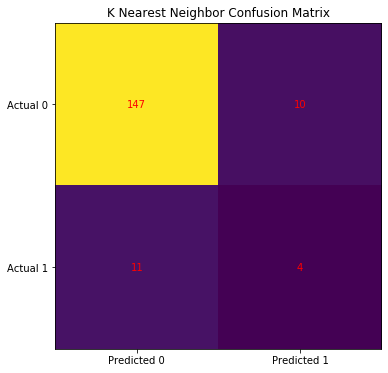

In [104]:
cm = confusion_matrix(y_test,pred_knn)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0','Predicted 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0','Actual 1'))
ax.set_title('K Nearest Neighbor Confusion Matrix')

ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

Area under the ROC curve: 0.601


C:\Users\namdo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


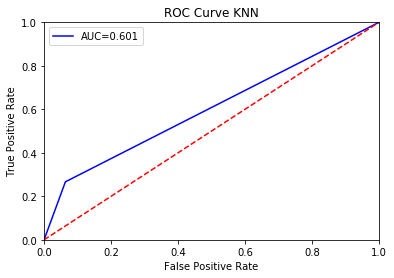

In [105]:
#Get data to plot ROC curve:
fp, tp, th = roc_curve(y_test, pred_knn)
roc_auc_knn = auc(fp, tp)

# Plot ROC Curve
plt.title('ROC Curve KNN')
plt.plot(fp, tp, 'b',
label='AUC=%0.3f'%roc_auc_knn)
plt.legend(loc='lower_right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('Area under the ROC curve: {:.3f}'.format(roc_auc_knn))

**RandomForestCLassifier**

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
model_rfc=RandomForestClassifier()
model_rfc.fit(X_train,y_train)

RandomForestClassifier()

In [108]:
pred_rfc=model_rfc.predict(X_test)

In [109]:
print(f'accuracy_rfc:{accuracy_score(pred_rfc,y_test)*100}')
print(f"precision_rfc:{precision_score(pred_rfc,y_test,average='macro')*100}")
print(f"recall_rfc:{recall_score(pred_rfc,y_test,average='macro')*100}")
print(f"f1_rfc:{f1_score(pred_rfc,y_test,average='macro')*100}")

accuracy_rfc:94.76744186046511
precision_rfc:88.0891719745223
recall_rfc:82.35930735930737
f1_rfc:84.91669102601578


In [110]:
print(classification_report(pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       154
           1       0.80      0.67      0.73        18

    accuracy                           0.95       172
   macro avg       0.88      0.82      0.85       172
weighted avg       0.94      0.95      0.95       172



1. Precision

•	96% of "Not Move" was predicted correctly

•	80% of "Move" was predicted correctly

2. Recall

•	98% of positive "Not Move" was caught

•	67% of positive "Move" was caught

3. F1-Score

•	97% "Not Move" of positive prediction was correct

•	73% "Move" of positive prediction was correct


Text(0.5, 1.0, 'Prediction Based on RandomForestClassifier')

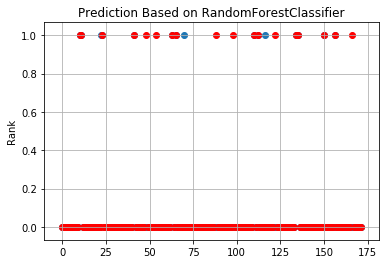

In [111]:
plt.scatter(X_test1,y_test)
plt.scatter(X_test1,pred_rfc,c='r')
plt.ylabel('Rank')
plt.grid()
plt.plot()
plt.title('Prediction Based on RandomForestClassifier')

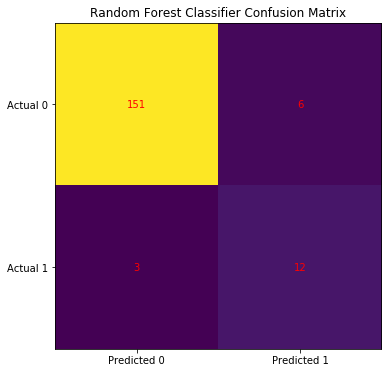

In [112]:
cm = confusion_matrix(y_test,pred_rfc)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0','Predicted 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0','Actual 1'))
ax.set_title('Random Forest Classifier Confusion Matrix')

ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

Area under the ROC curve: 0.881


C:\Users\namdo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


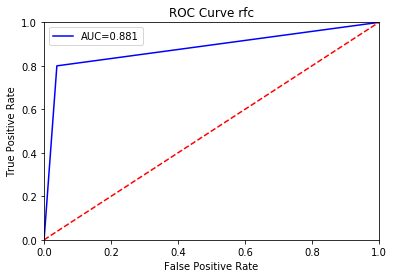

In [113]:
#Get data to plot ROC curve
fp, tp, th = roc_curve(y_test, pred_rfc)
roc_auc_rfc = auc(fp, tp)

# Plot ROC Curve
plt.title('ROC Curve rfc')
plt.plot(fp, tp, 'b',
label='AUC=%0.3f'%roc_auc_rfc)
plt.legend(loc='lower_right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('Area under the ROC curve: {:.3f}'.format(roc_auc_rfc))

**Naive Bayes**

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)

GaussianNB()

In [116]:
pred_nb = model_nb.predict(X_test)

In [117]:
print(f'accuracy_nb:{accuracy_score(pred_nb,y_test)*100}')
print(f"precision_nb:{precision_score(pred_nb,y_test,average='macro')*100}")
print(f"recall_nb:{recall_score(pred_nb,y_test,average='macro')*100}")
print(f"f1_nb:{f1_score(pred_nb,y_test,average='macro')*100}")

accuracy_nb:34.883720930232556
precision_nb:61.316348195329084
recall_nb:54.53617021276595
f1_nb:32.549019607843135


In [118]:
print(classification_report(pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.29      0.98      0.45        47
           1       0.93      0.11      0.20       125

    accuracy                           0.35       172
   macro avg       0.61      0.55      0.33       172
weighted avg       0.76      0.35      0.27       172



Text(0.5, 1.0, 'Prediction Based on Naives Bayes')

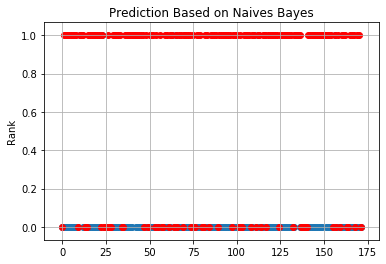

In [119]:
plt.scatter(X_test1,y_test)
plt.scatter(X_test1,pred_nb,c='r')
plt.ylabel('Rank')
plt.grid()
plt.plot()
plt.title('Prediction Based on Naives Bayes')

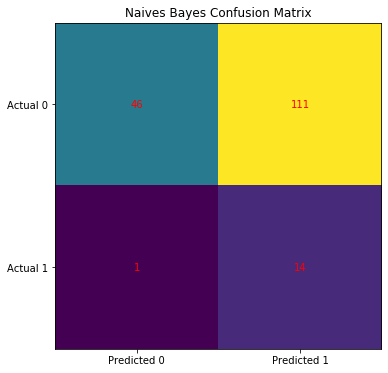

In [120]:
cm = confusion_matrix(y_test,pred_nb)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0','Predicted 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0','Actual 1'))
ax.set_title('Naives Bayes Confusion Matrix')

ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

Area under the ROC curve: 0.613


C:\Users\namdo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


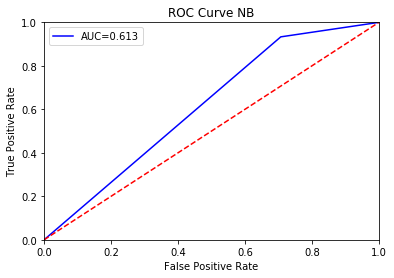

In [121]:
#Get data to plot ROC curve:
fp, tp, th = roc_curve(y_test, pred_nb)
roc_auc_nb = auc(fp, tp)

# Plot ROC Curve
plt.title('ROC Curve NB')
plt.plot(fp, tp, 'b',
label='AUC=%0.3f'%roc_auc_nb)
plt.legend(loc='lower_right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('Area under the ROC curve: {:.3f}'.format(roc_auc_nb))

In [122]:
print(f'accuracy_SVM:{model_SVM.score(X_train,y_train)*100}')
print(f'accuracy_log:{model_log.score(X_train,y_train)*100}')
print(f'accuracy_knn:{model_knn.score(X_train,y_train)*100}')
print(f'accuracy_rfc:{model_rfc.score(X_train,y_train)*100}')
print(f'accuracy_nb:{model_nb.score(X_train,y_train)*100}')

accuracy_SVM:66.61807580174927
accuracy_log:91.54518950437318
accuracy_knn:92.4198250728863
accuracy_rfc:100.0
accuracy_nb:43.00291545189505


In [128]:
# Create a frame to show score on both train and test
test_score = {'Train':[87.75,91.54,92.41,100,43],
              'Test':[87.21,91.27,87.79,94.76,35],
             'AUC Score':[66.2,65.1,60.1,88.1,61.3]}

test_score_frame = pd.DataFrame.from_dict(test_score, orient='index',columns=['Support Vector Machine','Logistic Regression','KNeareastNeighbor','Random Forest Classifier','Naives Bayes'])

test_score_frame

,Support Vector Machine,Logistic Regression,KNeareastNeighbor,Random Forest Classifier,Naives Bayes
Train,87.75,91.54,92.41,100.00,43.0
Test,87.21,91.27,87.79,94.76,35.0
AUC Score,66.20,65.10,60.10,88.10,61.3


In [129]:
X.shape
X1 = X.iloc[10].values
X1_new = X1.reshape((1,11))

In [130]:
pred_rfc1=model_rfc.predict(X1_new)
pred_rfc1

array([0], dtype=int64)

In [131]:
Y.iloc[10]

0

In [132]:
X.head(1)

,Employed,Income,Rental Price_1 bedroom,Rental Price_2 bedroom,Number of University,Student Count,total_award,total_grad_value,pell_value,retain_value,cohort_size
0,4524,58743,876,1133,9,52366,604,552,449,493,8586


**Let predict the State of Virginia and County of Fairfax**

**Employed = 5000, Income = 65000, Rental Price_1 bedroom = 1000, RentalPrice_2 bedroom = 1500, No of University = 15, Student Count = 60000, total_award = 1000, total_grad_value = 2000, pell_value = 6000, retain_value = 1000, cohort_size = 10000**

In [133]:
X2 = np.reshape([5000, 65000, 1000, 1500, 15, 60000, 1000, 2000, 6000, 1000, 10000],(11,1)).T
X2.shape

(1, 11)

In [134]:
pred_rfc2=model_rfc.predict(X2)
pred_rfc2

array([0], dtype=int64)